# TASK 5.2 PREPARE AND EXPLORE THE DATA
**Contents of this notebook:** Part I: Exploratory Data Analysis, Part II: Lessons Learned Report
## Part I: Exploratory Data Analysis

**BACKGROUND**

**Problems:** 

1. Increase in customer default rates: This is bad for Credit One since we approve the customers for loans in the first place.

2. Revenue and customer loss for clients then loss of clients for Credit One.

We cannot control habits, nor identify their underlying "why". We will focus on identifying the attributes statistically significant to the problems, and derive information from the data available. Through different methods, we will uncover information.


**Importing and pre-processing the data**

In [1]:
# IMPORT LIBRARIES (Always first cell): In order to access different functions and methods inside a library.
import pandas as pd # This call Pandas library from PC and make it accessible for the project calling it 'pd'
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt # Used for visualization in data science
import seaborn as sns # Used for visualization in data science
%matplotlib inline

In [2]:
# IMPORT DATA: Note: has to be in the same folder where is the notebook. Default structure: dataframe.
credit = pd.read_csv('default_credit_card_clients.csv', header =1)

In [3]:
credit.head()# quick view sample the dataframe by calling the name in a cell

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# RENAME OF COLUMNS
credit.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_STATUS_M9', 'PAY_STATUS_M8', 'PAY_STATUS_M7', 'PAY_STATUS_M6',
       'PAY_STATUS_M5', 'PAY_STATUS_M4', 'BILL_M9', 'BILL_M8', 'BILL_M7', 'BILL_M6', 'BILL_M5', 'BILL_M4', 'PAID_M9', 'PAID_M8',
       'PAID_M7', 'PAID_M6', 'PAID_M5', 'PAID_M4', 'DEFAULT']

In [5]:
credit.columns # confirmation of new column names

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_STATUS_M9', 'PAY_STATUS_M8', 'PAY_STATUS_M7', 'PAY_STATUS_M6',
       'PAY_STATUS_M5', 'PAY_STATUS_M4', 'BILL_M9', 'BILL_M8', 'BILL_M7',
       'BILL_M6', 'BILL_M5', 'BILL_M4', 'PAID_M9', 'PAID_M8', 'PAID_M7',
       'PAID_M6', 'PAID_M5', 'PAID_M4', 'DEFAULT'],
      dtype='object')

In [6]:
credit.describe() # equivalent to summary() in R. 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_M9,PAY_STATUS_M8,PAY_STATUS_M7,PAY_STATUS_M6,...,BILL_M6,BILL_M5,BILL_M4,PAID_M9,PAID_M8,PAID_M7,PAID_M6,PAID_M5,PAID_M4,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
credit.info() # Dataset structure. All data was imported as integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             30000 non-null  int64
 1   LIMIT_BAL      30000 non-null  int64
 2   SEX            30000 non-null  int64
 3   EDUCATION      30000 non-null  int64
 4   MARRIAGE       30000 non-null  int64
 5   AGE            30000 non-null  int64
 6   PAY_STATUS_M9  30000 non-null  int64
 7   PAY_STATUS_M8  30000 non-null  int64
 8   PAY_STATUS_M7  30000 non-null  int64
 9   PAY_STATUS_M6  30000 non-null  int64
 10  PAY_STATUS_M5  30000 non-null  int64
 11  PAY_STATUS_M4  30000 non-null  int64
 12  BILL_M9        30000 non-null  int64
 13  BILL_M8        30000 non-null  int64
 14  BILL_M7        30000 non-null  int64
 15  BILL_M6        30000 non-null  int64
 16  BILL_M5        30000 non-null  int64
 17  BILL_M4        30000 non-null  int64
 18  PAID_M9        30000 non-null  int64
 19  PAID

In [8]:
credit.isnull().values.any() # transformation: identify if there are any null values. There are no missing values

False

In [9]:
# TRANSFORMATION AND TEXT CLEANING
credit['SEX'].replace([1,2],['male','female'], inplace=True)
credit['EDUCATION'].replace([0,1,2,3,4,5,6],['other','grad_school','university',
                                             'high_school', 'other',
                                             'other','other'], inplace=True)
credit['MARRIAGE'].replace([0,1,2,3],['other', 'married', 'single', 
                                      'divorce'], inplace=True)

def set_payment_status(df, col):
  df[col].replace([-2,-1,0,1,2,3,4,5,6,7,8,9],
                  ['no_consumption','paid_in_full','use_revolving_credit',
                   'delay_1m','delay_2m','delay_3m','delay_4m','delay_5m',
                   'delay_6m','delay_7m','delay_8m','delay_9m'], inplace=True)

set_payment_status(credit, 'PAY_STATUS_M9')
set_payment_status(credit, 'PAY_STATUS_M8')
set_payment_status(credit, 'PAY_STATUS_M7')
set_payment_status(credit, 'PAY_STATUS_M6')
set_payment_status(credit, 'PAY_STATUS_M5')
set_payment_status(credit, 'PAY_STATUS_M4')

credit['DEFAULT'].replace([0,1],['False','True'], inplace=True)

for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_STATUS_M9','PAY_STATUS_M8',
            'PAY_STATUS_M7','PAY_STATUS_M6','PAY_STATUS_M5',
            'PAY_STATUS_M4', 'DEFAULT']:            
            credit[col] = credit[col].astype('category')

In [10]:
credit.sample(10) # confirmation of changes made

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_STATUS_M9,PAY_STATUS_M8,PAY_STATUS_M7,PAY_STATUS_M6,...,BILL_M6,BILL_M5,BILL_M4,PAID_M9,PAID_M8,PAID_M7,PAID_M6,PAID_M5,PAID_M4,DEFAULT
7457,7458,100000,female,university,married,34,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,...,101856,101105,101071,4600,5000,4000,4000,4200,3800,False
28959,28960,220000,female,university,married,34,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,...,40737,42743,44052,3000,2000,2000,3000,2000,3000,False
10326,10327,20000,male,university,single,22,paid_in_full,use_revolving_credit,use_revolving_credit,use_revolving_credit,...,18982,13762,0,1451,1400,380,0,0,0,True
20578,20579,100000,male,university,married,29,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,...,57079,16634,26438,2303,3000,3000,1000,10022,3065,False
16027,16028,30000,female,university,single,41,delay_1m,delay_2m,use_revolving_credit,use_revolving_credit,...,21295,19076,9292,0,1600,1500,1000,1720,0,False
8172,8173,500000,male,grad_school,single,43,use_revolving_credit,use_revolving_credit,use_revolving_credit,paid_in_full,...,3887,0,7413,22650,0,3887,0,7413,0,True
28438,28439,270000,female,grad_school,married,37,no_consumption,no_consumption,no_consumption,no_consumption,...,189,-75,525,217,300,200,0,600,200,False
27727,27728,30000,female,university,married,23,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,...,26067,25357,25887,1670,1500,2609,0,930,946,True
4133,4134,200000,female,university,married,39,use_revolving_credit,use_revolving_credit,delay_2m,use_revolving_credit,...,131741,134488,137240,9201,5000,4500,4600,4700,5319,True
22415,22416,20000,female,high_school,single,37,delay_2m,delay_2m,delay_2m,delay_2m,...,12495,12787,13583,2000,902,500,500,1000,700,False


In [11]:
credit.info() # checking column types; look the changes to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             30000 non-null  int64   
 1   LIMIT_BAL      30000 non-null  int64   
 2   SEX            30000 non-null  category
 3   EDUCATION      30000 non-null  category
 4   MARRIAGE       30000 non-null  category
 5   AGE            30000 non-null  int64   
 6   PAY_STATUS_M9  30000 non-null  category
 7   PAY_STATUS_M8  30000 non-null  category
 8   PAY_STATUS_M7  30000 non-null  category
 9   PAY_STATUS_M6  30000 non-null  category
 10  PAY_STATUS_M5  30000 non-null  category
 11  PAY_STATUS_M4  30000 non-null  category
 12  BILL_M9        30000 non-null  int64   
 13  BILL_M8        30000 non-null  int64   
 14  BILL_M7        30000 non-null  int64   
 15  BILL_M6        30000 non-null  int64   
 16  BILL_M5        30000 non-null  int64   
 17  BILL_M4        30000 non-null  

In [12]:
credit.to_csv('fixed_credit.csv') #  as pre-processing has been finished, a csv file (Pandas) is written for later use.

**EXPLORATORY DATA ANALYSIS (EDA)**

It has been written (Mayo, 2017) that "Exploratory data analysis (EDA) is an integral aspect of any greater data analysis, data science, or machine learning project. Understanding data before working with it isn't just a pretty good idea, it is a priority if you plan on accomplishing anything of consequence."

EDA usually involves at least some, if not all, of the following:
1. Visualization and Statistics about each variable
2. Scatter plots comparing the relationships between any two variables
3. If needed, visualizing the relationship between many (more than 2) variables
4. Checking for collinearity or performing dimensionality reduction 

**Statistics about each variable**

In [13]:
credit.describe() # statistics are calculated

,ID,LIMIT_BAL,AGE,BILL_M9,BILL_M8,BILL_M7,BILL_M6,BILL_M5,BILL_M4,PAID_M9,PAID_M8,PAID_M7,PAID_M6,PAID_M5,PAID_M4
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [14]:
credit.describe(include='category') # this includes category for the descriptions

,SEX,EDUCATION,MARRIAGE,PAY_STATUS_M9,PAY_STATUS_M8,PAY_STATUS_M7,PAY_STATUS_M6,PAY_STATUS_M5,PAY_STATUS_M4,DEFAULT
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,4,4,11,11,11,11,10,10,2
top,female,university,single,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,use_revolving_credit,False
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286,23364


In [15]:
credit.groupby('SEX')['SEX'].count() # more descriptive analysis: agrupation; example distribution by sex

SEX
female    18112
male      11888
Name: SEX, dtype: int64

In [16]:
credit.groupby('DEFAULT')['DEFAULT'].count() # more descriptive analysis: agrupation; example distribution by sex

DEFAULT
False    23364
True      6636
Name: DEFAULT, dtype: int64

**Visualizations about each variable**

To make visualizations, the first step is have clear the variables available.

In [17]:
header = credit.dtypes.index # Pandas. Confirm column names in dataframe to build plots for each, where needed.
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_STATUS_M9', 'PAY_STATUS_M8', 'PAY_STATUS_M7', 'PAY_STATUS_M6',
       'PAY_STATUS_M5', 'PAY_STATUS_M4', 'BILL_M9', 'BILL_M8', 'BILL_M7',
       'BILL_M6', 'BILL_M5', 'BILL_M4', 'PAID_M9', 'PAID_M8', 'PAID_M7',
       'PAID_M6', 'PAID_M5', 'PAID_M4', 'DEFAULT'],
      dtype='object')


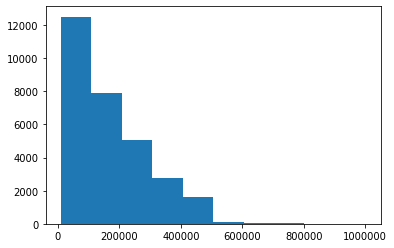

In [18]:
plt.hist(credit['LIMIT_BAL']) # first histogram using the .hist method of matplotlib
plt.show()

After changing the number of bins, it is possible to identify a little peak preferred by high incomers close to 500.000:

(array([4.311e+03, 4.921e+03, 3.266e+03, 2.792e+03, 2.336e+03, 2.752e+03,
        2.555e+03, 1.109e+03, 1.395e+03, 7.580e+02, 1.400e+03, 6.010e+02,
        3.290e+02, 4.040e+02, 8.650e+02, 4.900e+01, 4.500e+01, 3.300e+01,
        2.700e+01, 1.300e+01, 1.600e+01, 1.100e+01, 7.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  10000.,   43000.,   76000.,  109000.,  142000.,  175000.,
         208000.,  241000.,  274000.,  307000.,  340000.,  373000.,
         406000.,  439000.,  472000.,  505000.,  538000.,  571000.,
         604000.,  637000.,  670000.,  703000.,  736000.,  769000.,
         802000.,  835000.,  868000.,  901000.,  934000.,  967000.,
        1000000.]),
 <a list of 30 Patch objects>)

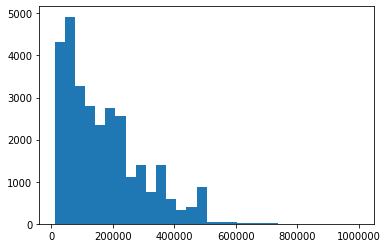

In [19]:
plt.hist(credit['LIMIT_BAL'], bins=30) #change of number of bins to 30

In [20]:
print(credit.shape) # this identifies numbes of rows and number of columns

(30000, 25)


Subsetting to graph defaulters vs non-defaulters
Link of reference: https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

In [21]:
non_default = credit['DEFAULT']=='False'

In [22]:
print(non_default.shape)

(30000,)


In [23]:
credit_nondefault = credit[non_default]

In [24]:
print(credit_nondefault.shape) # this gives the dimension of the dataframe, which is consequent to grouping before.

(23364, 25)


In [25]:
is_default = credit['DEFAULT']!='False'

In [26]:
print(is_default.shape)

(30000,)


In [27]:
credit_default = credit[is_default]

In [28]:
print(credit_default.shape)

(6636, 25)


A comparison is made by numerical statistics. In the limit balance, the mean is 36% greater in non defaulters.

In [29]:
credit_default.describe()

,ID,LIMIT_BAL,AGE,BILL_M9,BILL_M8,BILL_M7,BILL_M6,BILL_M5,BILL_M4,PAID_M9,PAID_M8,PAID_M7,PAID_M6,PAID_M5,PAID_M4
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000
mean,14773.781947,130109.656420,35.725738,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068
std,8571.616622,115378.540571,9.693438,73782.067220,71651.030364,68516.975738,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894
min,1.000000,10000.000000,21.000000,-6676.000000,-17710.000000,-61506.000000,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7408.500000,50000.000000,28.000000,2987.750000,2694.000000,2500.000000,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14758.500000,90000.000000,34.000000,20185.000000,20300.500000,19834.500000,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000
75%,21831.750000,200000.000000,42.000000,59626.500000,57919.750000,54733.750000,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000
max,30000.000000,740000.000000,75.000000,613860.000000,581775.000000,578971.000000,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000


In [30]:
credit_nondefault.describe()

,ID,LIMIT_BAL,AGE,BILL_M9,BILL_M8,BILL_M7,BILL_M6,BILL_M5,BILL_M4,PAID_M9,PAID_M8,PAID_M7,PAID_M6,PAID_M5,PAID_M4
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000
mean,15064.893982,178099.726074,35.417266,51994.227273,49717.435670,4.753337e+04,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769
std,8684.552145,131628.359660,9.077355,73577.606694,71029.946709,6.957666e+04,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473
min,3.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7526.750000,70000.000000,28.000000,3677.250000,3055.000000,2.769750e+03,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000
50%,15073.500000,150000.000000,34.000000,23119.500000,21660.500000,2.020250e+04,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000
75%,22637.250000,250000.000000,41.000000,69027.000000,65686.000000,6.189400e+04,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000
max,29997.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


**Bar Graphs** (For categorical variables)

Text(-8.825000000000003, 0.5, 'Count of customers')

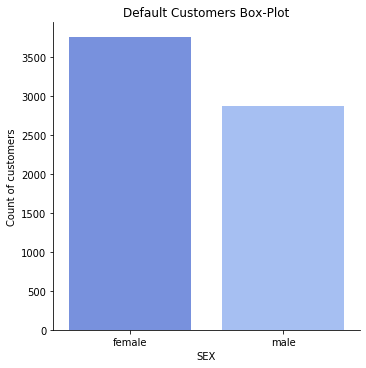

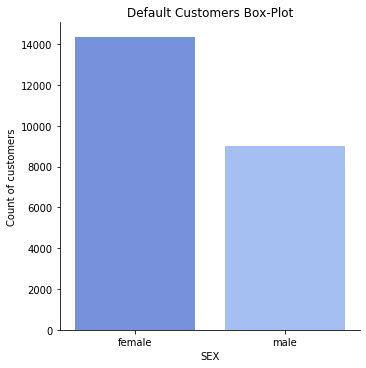

In [228]:
# Comparison by Sex
sns.set_palette('coolwarm')
sns.catplot(x='SEX', kind='count', data=credit_default)
plt.title('Default Customers Box-Plot')
plt.ylabel('Count of customers')

sns.catplot(x='SEX', kind='count', data=credit_nondefault)
plt.title('Default Customers Box-Plot')
plt.ylabel('Count of customers')

In [256]:
credit.groupby('SEX')['SEX'].count() 

SEX
female    18112
male      11888
Name: SEX, dtype: int64

In [257]:
credit_default.groupby('SEX')['SEX'].count() 

SEX
female    3763
male      2873
Name: SEX, dtype: int64

In [252]:
fem_failure_rate = 3763/18112*100
fem_failure_rate = format(fem_failure_rate, '.2f')
print('The Credit One Female Failure Rate is =',fem_failure_rate, '%')

The Credit One Female Failure Rate is = 20.78 %


In [255]:
male_failure_rate = 2873/11888*100
male_failure_rate = format(male_failure_rate, '.2f')
print('The Credit One Male Failure Rate is =',male_failure_rate, '%')

The Credit One Male Failure Rate is = 24.17 %


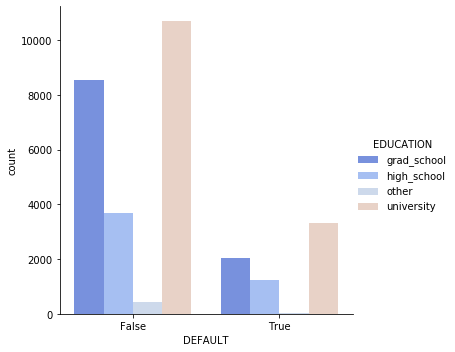

In [32]:
# Comparison by Education
sns.catplot(x='DEFAULT', hue='EDUCATION', kind='count', data=credit);

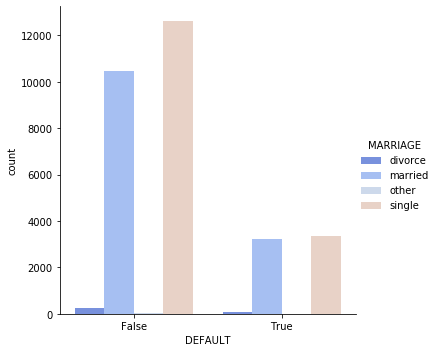

In [33]:
# Comparison by Marriage
sns.catplot(x='DEFAULT', hue='MARRIAGE', kind='count', data=credit);

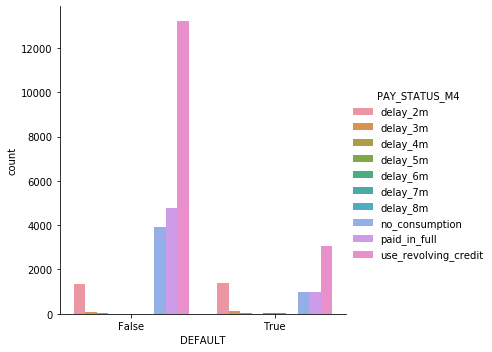

In [259]:
# Comparison by Pay Status Month 4 (APRIL)
sns.catplot(x='DEFAULT', hue='PAY_STATUS_M4', kind='count', data=credit);

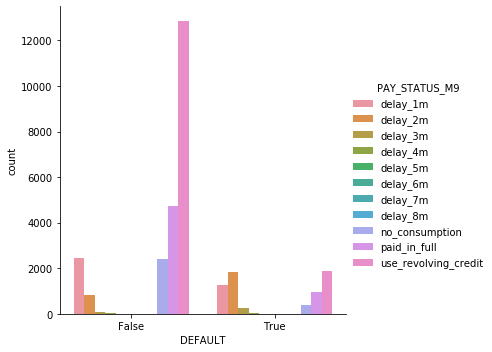

In [35]:
# Comparison by Pay Status Month 9 (SEPT)
sns.catplot(x='DEFAULT', hue='PAY_STATUS_M9', kind='count', data=credit);

**Histograms** (For continuous variables)

(array([1.463e+03, 1.210e+03, 7.390e+02, 7.400e+02, 4.940e+02, 3.030e+02,
        5.890e+02, 2.480e+02, 1.500e+02, 1.880e+02, 2.180e+02, 4.600e+01,
        7.100e+01, 4.800e+01, 1.060e+02, 5.000e+00, 7.000e+00, 2.000e+00,
        5.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([      0.        ,   33333.33333333,   66666.66666667,
         100000.        ,  133333.33333333,  166666.66666667,
         200000.        ,  233333.33333333,  266666.66666667,
         300000.        ,  333333.33333333,  366666.66666667,
         400000.        ,  433333.33333333,  466666.66666667,
         500000.        ,  533333.33333333,  566666.66666667,
         600000.        ,  633333.33333333,  666666.66666667,
         700000.        ,  733333.33333333,  766666.66666667,
         800000.        ,  833333.33333333,  866666.66666667,
         900000.        ,  933333.33333333,  966666.66666667,
        

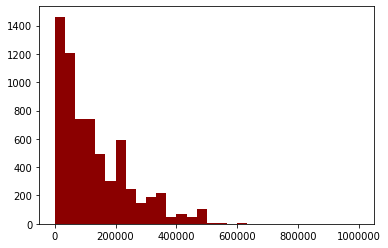

In [36]:
plt.hist(credit_default['LIMIT_BAL'], bins=30, color='darkred',range=[0, 1000000]) # range was adjusted to non-defaulters

(array([2.756e+03, 3.593e+03, 2.465e+03, 2.154e+03, 1.934e+03, 2.257e+03,
        2.126e+03, 9.430e+02, 1.178e+03, 6.650e+02, 1.174e+03, 5.320e+02,
        2.890e+02, 3.450e+02, 7.700e+02, 4.400e+01, 3.800e+01, 2.800e+01,
        2.500e+01, 1.300e+01, 1.500e+01, 9.000e+00, 6.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  10000.,   43000.,   76000.,  109000.,  142000.,  175000.,
         208000.,  241000.,  274000.,  307000.,  340000.,  373000.,
         406000.,  439000.,  472000.,  505000.,  538000.,  571000.,
         604000.,  637000.,  670000.,  703000.,  736000.,  769000.,
         802000.,  835000.,  868000.,  901000.,  934000.,  967000.,
        1000000.]),
 <a list of 30 Patch objects>)

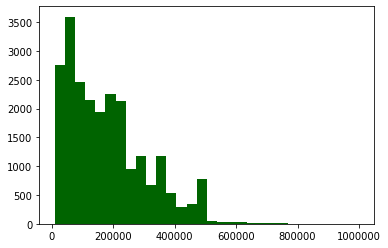

In [37]:
plt.hist(credit_nondefault['LIMIT_BAL'], bins=30, color='darkgreen') 

Comparison by Age

(array([1285., 1415., 1380.,  950.,  705.,  564.,  220.,   89.,   21.,
           7.]),
 array([21. , 26.4, 31.8, 37.2, 42.6, 48. , 53.4, 58.8, 64.2, 69.6, 75. ]),
 <a list of 10 Patch objects>)

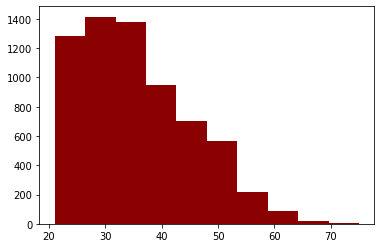

In [38]:
plt.hist(credit_default['AGE'], bins=10, color='darkred')

(array([3.842e+03, 6.621e+03, 5.165e+03, 3.744e+03, 1.990e+03, 1.382e+03,
        4.560e+02, 1.300e+02, 3.000e+01, 4.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <a list of 10 Patch objects>)

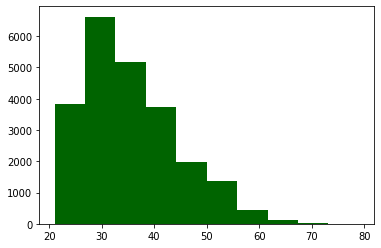

In [39]:
plt.hist(credit_nondefault['AGE'], bins=10, color='darkgreen') 

**Line Plots**

Line plots are often used in EDA to illustrate the range and mode of any given numerical variable. This can be very important for things like preventing bias and model overfit and even identifying collinearity.Creating line plots is made in matplotlib for single variables or multivariate. Lets start by creating a line plot for the same variable we studied previously. For example:

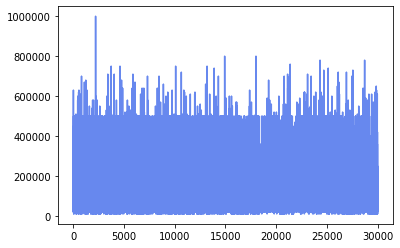

In [40]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

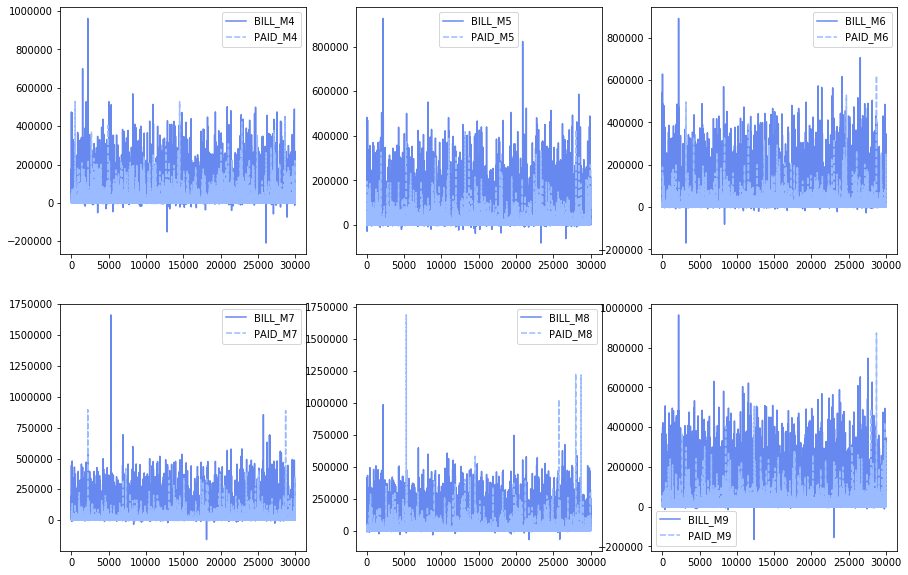

In [41]:
# NON DEFAULTERS. Customers Bills vs Payments !Attention: it takes several minutes to run
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for col, ax in zip([('BILL_M4','PAID_M4'),
                    ('BILL_M5','PAID_M5'), 
                    ('BILL_M6','PAID_M6'), 
                    ('BILL_M7','PAID_M7'),
                    ('BILL_M8','PAID_M8'), 
                    ('BILL_M9','PAID_M9')], axes.flatten()):
  #ax.plot(credit_nondefault[[col]])
  _bill, _paid = col
  sns.lineplot(data=credit_nondefault[[_bill, _paid]], ax=ax)
plt.show()

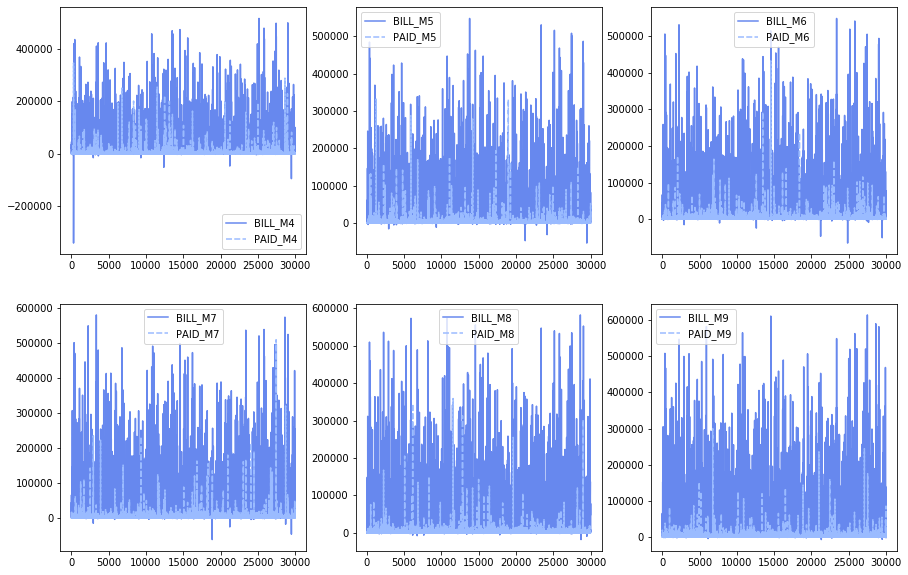

In [42]:
# DEFAULTERS. Customers Bills vs Payments !Attention: it takes several minutes to run
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for col, ax in zip([('BILL_M4','PAID_M4'),
                    ('BILL_M5','PAID_M5'), 
                    ('BILL_M6','PAID_M6'), 
                    ('BILL_M7','PAID_M7'),
                    ('BILL_M8','PAID_M8'), 
                    ('BILL_M9','PAID_M9')], axes.flatten()):
  #ax.plot(credit_default[[col]])
  _bill, _paid = col
  sns.lineplot(data=credit_default[[_bill, _paid]], ax=ax)
plt.show()

**Visualizing the relationship between variables**

**Scatter plots**

Scatter plots are very useful for comparing two features (bivariate and multiple features (multivariate) to each other. This is very useful for understanding any possible relationships between the data, but as you are aware, does not always point to any causal relationship.

The following graphs, show that defaulters and non-defaulters behave different. Both groups tend to remain with the bill but visually and taking into account proportion there more point below the 45° angle in non-defaulters vs defaulters.

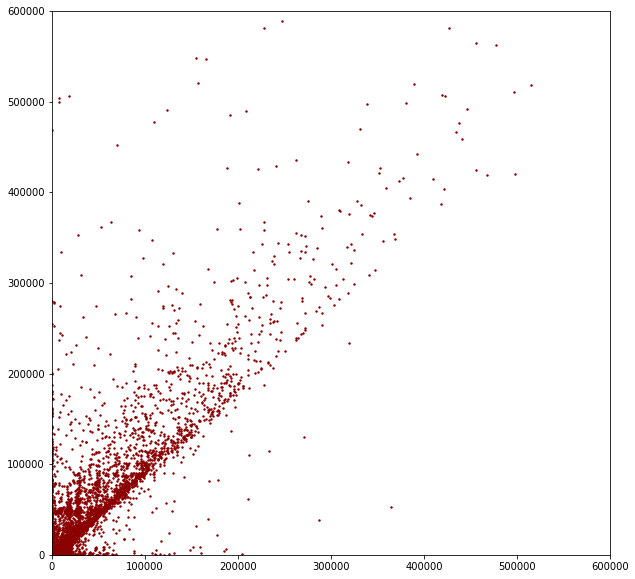

In [90]:
# Set of features
x = credit_default['BILL_M4']
y = credit_default['BILL_M9']
plt.figure(figsize=(10,10))
plt.xlim(0, 600000) # adjustment axis range after graphing  default and non default, without outliers and same scale
plt.ylim(0, 600000)

# Use matplotlib to create the scatter plot using the two variables for the X and Y axes
plt.scatter(x,y,s=2,color='darkred')
plt.show()

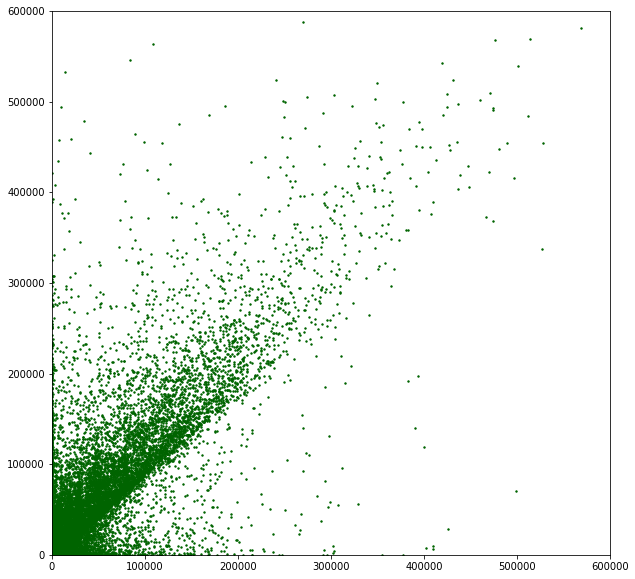

In [91]:
# Set of features
x = credit_nondefault['BILL_M4']
y = credit_nondefault['BILL_M9']
plt.figure(figsize=(10,10))
plt.xlim(0, 600000)
plt.ylim(0, 600000)

# Use matplotlib to create the scatter plot using the two variables for the X and Y axes
plt.scatter(x,y,s=2,color='darkgreen')
plt.show()

**Box plots**

Also called Box and Whisker Plots, are very useful for quickly visualizing where the bulk of the data is in any given feature ad are also very useful for identifying feature with outliers or extreme variances in the observations. Understanding what features might contain outliers is important in Data Science and Machine Learning.

In [93]:
# Remembering the name of the columns to choose one
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_STATUS_M9', 'PAY_STATUS_M8', 'PAY_STATUS_M7', 'PAY_STATUS_M6',
       'PAY_STATUS_M5', 'PAY_STATUS_M4', 'BILL_M9', 'BILL_M8', 'BILL_M7',
       'BILL_M6', 'BILL_M5', 'BILL_M4', 'PAID_M9', 'PAID_M8', 'PAID_M7',
       'PAID_M6', 'PAID_M5', 'PAID_M4', 'DEFAULT'],
      dtype='object')


Text(0, 0.5, 'Total credit limit (NT$)')

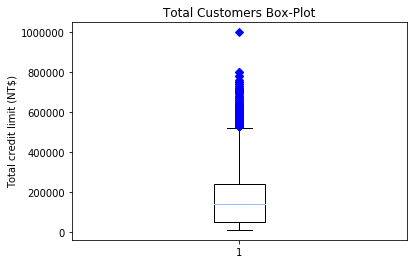

In [166]:
A = credit['LIMIT_BAL']
plt.boxplot(A,0,'bD')
plt.title('Total Customers Box-Plot')
plt.ylabel('Total credit limit (NT$)')

Text(0, 0.5, 'Total credit limit (NT$)')

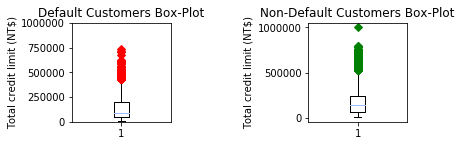

In [176]:
B = credit_default['LIMIT_BAL']
plt.subplot(2,3,4)
plt.boxplot(B,0,'rD')
plt.ylim(0, 1000000)
plt.title('Default Customers Box-Plot')
plt.ylabel('Total credit limit (NT$)')

C = credit_nondefault['LIMIT_BAL']
plt.subplot(2,3,6)
plt.boxplot(C,0,'gD')
plt.title('Non-Default Customers Box-Plot')
plt.ylabel('Total credit limit (NT$)')


**Checking for collinearity or performing dimensionality reduction**

**Correlation**

Whether addressing collinearity or checking for relationships between features for selection or engineering, calculating correlation is a vital part of all Data Science projects and it is easy to do using pandas or even numpy.

In [208]:
# To understand the strength of relationships between any two variables 
credit_var = credit.iloc[:,1:24] # use of iloc to exclude ID as a variable
corrMat = credit_var.cov()
print(corrMat)

              LIMIT_BAL            AGE       BILL_M9       BILL_M8  \
LIMIT_BAL  1.683446e+10  173076.722569  2.727020e+09  2.570130e+09   
AGE        1.730767e+05      84.969755  3.817293e+04  3.561366e+04   
BILL_M9    2.727020e+09   38172.933546  5.422240e+09  4.986670e+09   
BILL_M8    2.570130e+09   35613.657962  4.986670e+09  5.065705e+09   
BILL_M7    2.548533e+09   34334.251320  4.556511e+09  4.582086e+09   
BILL_M6    2.453926e+09   30453.108180  4.075286e+09  4.086508e+09   
BILL_M5    2.331481e+09   27654.067800  3.714795e+09  3.720401e+09   
BILL_M4    2.243837e+09   26137.648547  3.519876e+09  3.524868e+09   
PAID_M9    4.195711e+08    3992.041735  1.710894e+08  3.305146e+08   
PAID_M8    5.333504e+08    4626.861549  1.685692e+08  1.653859e+08   
PAID_M7    4.801180e+08    4746.824393  2.034048e+08  1.888731e+08   
PAID_M6    4.131202e+08    3087.324192  1.826164e+08  1.643518e+08   
PAID_M5    4.305657e+08    3218.052172  1.879091e+08  1.717652e+08   
PAID_M4    5.065153e

**Covariance**

Covariance is often used to gauge the linear degree of change between two variables. Covariance can be used to measure how changes in one variable are associated with changes in a second variable. It is important when studying the impact various features might have on default rates.

In [207]:
credit_var = credit.iloc[:,1:24] #u
covMat = credit_var.cov()
print(covMat)

              LIMIT_BAL            AGE       BILL_M9       BILL_M8  \
LIMIT_BAL  1.683446e+10  173076.722569  2.727020e+09  2.570130e+09   
AGE        1.730767e+05      84.969755  3.817293e+04  3.561366e+04   
BILL_M9    2.727020e+09   38172.933546  5.422240e+09  4.986670e+09   
BILL_M8    2.570130e+09   35613.657962  4.986670e+09  5.065705e+09   
BILL_M7    2.548533e+09   34334.251320  4.556511e+09  4.582086e+09   
BILL_M6    2.453926e+09   30453.108180  4.075286e+09  4.086508e+09   
BILL_M5    2.331481e+09   27654.067800  3.714795e+09  3.720401e+09   
BILL_M4    2.243837e+09   26137.648547  3.519876e+09  3.524868e+09   
PAID_M9    4.195711e+08    3992.041735  1.710894e+08  3.305146e+08   
PAID_M8    5.333504e+08    4626.861549  1.685692e+08  1.653859e+08   
PAID_M7    4.801180e+08    4746.824393  2.034048e+08  1.888731e+08   
PAID_M6    4.131202e+08    3087.324192  1.826164e+08  1.643518e+08   
PAID_M5    4.305657e+08    3218.052172  1.879091e+08  1.717652e+08   
PAID_M4    5.065153e

In [206]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             30000 non-null  int64   
 1   LIMIT_BAL      30000 non-null  int64   
 2   SEX            30000 non-null  category
 3   EDUCATION      30000 non-null  category
 4   MARRIAGE       30000 non-null  category
 5   AGE            30000 non-null  int64   
 6   PAY_STATUS_M9  30000 non-null  category
 7   PAY_STATUS_M8  30000 non-null  category
 8   PAY_STATUS_M7  30000 non-null  category
 9   PAY_STATUS_M6  30000 non-null  category
 10  PAY_STATUS_M5  30000 non-null  category
 11  PAY_STATUS_M4  30000 non-null  category
 12  BILL_M9        30000 non-null  int64   
 13  BILL_M8        30000 non-null  int64   
 14  BILL_M7        30000 non-null  int64   
 15  BILL_M6        30000 non-null  int64   
 16  BILL_M5        30000 non-null  int64   
 17  BILL_M4        30000 non-null  

## Part II: Lesssons Learned Report

**Lessons learned of potential business value from this analysis**

Exploratory Data Analysis are indispensable. Visualizations are important to detect possible patterns that are gold (that is why is named datamining) before taking the next step of building and evaluating models. I initiated with some possible hypothesis in my head and ended with new questions which can be a base to experiment. I used many techniques: box-plot, histogram, scatter plot; but there are more to deep in: multi-vari chart, run chart (lines chart), pareto chart, stem and leaf plot, paralell coordinates, odds ratio, targeted projection pursuit (I cannot wait to try this one as it is interactive), among others. 

**Main lessons learned from this experience**

I love Python; it is more versatile and straightforward when compared to R; but it is a little bit more complicated in concepts associated with object-programming. Writing down everything just as I have being doing is always very valuable way to learn and confirm concepts. 

**Recommendations to Guido regarding your findings**

The problem of increase in customer default rates which is bad for Credit One: This can be diminished by developing a model which can identify the probability of default based on variables; which I recommend to be the next step, then make a plan of action according to different ranges of probability; this is assigning more loans to the ones that are more probable of not defaulting. 
Revenue and customer loss for clients and, eventually, loss of clients for Credit One: In the EDA, there is a clear behavior of customers increasing their debt through time. Even though behavior cannot be changed, it can be modified, by revising limits of credits.

**How to ensure that customers can/will pay their loans? Can we do this?**

We cannnot change control customer spending habits, but we can limit them. According to data, male default rate is almost 4% greater than female. This means that if we have resources we can assign it for example to give education or promotions to pay to males.